№11 - ORB

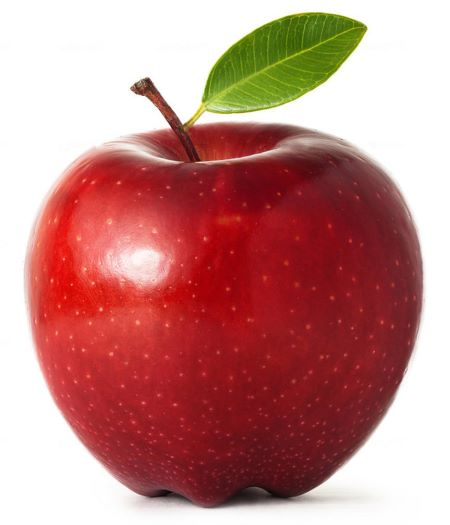

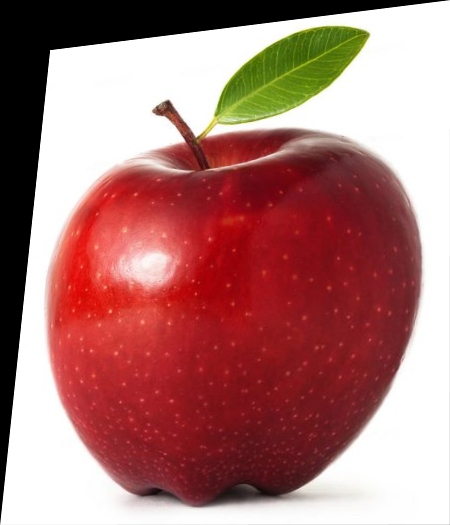

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('apple.jpg')

# Define the corners of the desired perspective
src_corners = np.float32([[0, 0], [img.shape[1], 0], [0, img.shape[0]], [img.shape[1], img.shape[0]]])
dst_corners = np.float32([[50, 50], [img.shape[1], 0], [0, img.shape[0]], [img.shape[1], img.shape[0]]])

# Calculate the perspective transform matrix and apply it to the image
M = cv2.getPerspectiveTransform(src_corners, dst_corners)
distorted_img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Display the original and distorted images
cv2_imshow(img)
cv2_imshow(distorted_img)

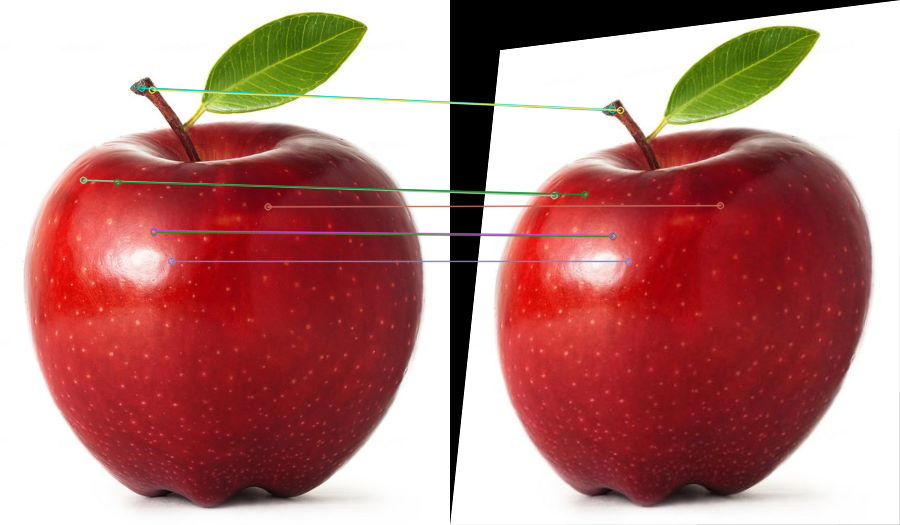

In [32]:
# Convert the images to grayscale
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(distorted_img, cv2.COLOR_BGR2GRAY)

# Create an ORB object and detect keypoints and descriptors in the two images
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Create a Brute-Force matcher and match the descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort the matches by distance and select the best ones
matches = sorted(matches, key=lambda x: x.distance)
best_matches = matches[:10]

# Draw the matches between the two images
match_img = cv2.drawMatches(img, kp1, distorted_img, kp2, best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches image
cv2_imshow(match_img)